In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pandas as pd
import shutil
import pathlib

In [3]:
print(tf.__version__)

2.6.0


In [4]:
print(keras.__version__)

2.6.0


In [5]:
list_class = os.listdir('../Dataset/train')
list_tuple = []
for element in list_class :
    nb = os.listdir('../Dataset/train/'+element)
    tuple = (element, len(nb))
    list_tuple.append(tuple)

In [6]:
df = pd.DataFrame(list_tuple, columns =['Class', 'Number'])

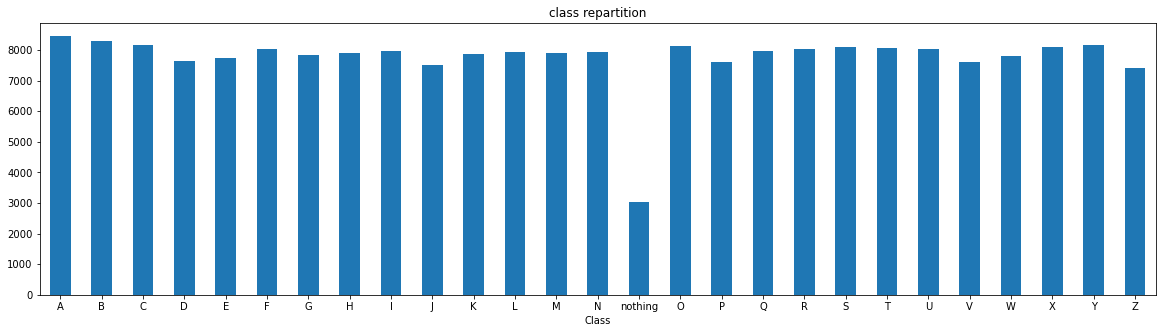

In [7]:
ax = df.plot.bar(x='Class', y='Number', rot=0, figsize=(20,5), title="class repartition", legend=False)

In [11]:
batch_size = 32
img_height = 64
img_width = 64

In [12]:
data_dir = '../Dataset/train'
os.listdir(data_dir)
data_dir = pathlib.Path(data_dir)

In [13]:
#shutil.rmtree(data_dir+"/space")
#shutil.rmtree(data_dir+"/del")

We build our training data set, with 80% of our dataset

In [14]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    subset="training",
    validation_split=0.2,
    seed=1,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 209167 files belonging to 27 classes.
Using 167334 files for training.


and after our validation dataset with the 20% remaining

In [15]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=1,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 209167 files belonging to 27 classes.
Using 41833 files for validation.


we display the 27 classes, consisting of all the letters of the alphabet and the class nothing 

In [16]:
class_names = train_dataset.class_names
print(class_names)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'nothing']


display a sample of 25 images

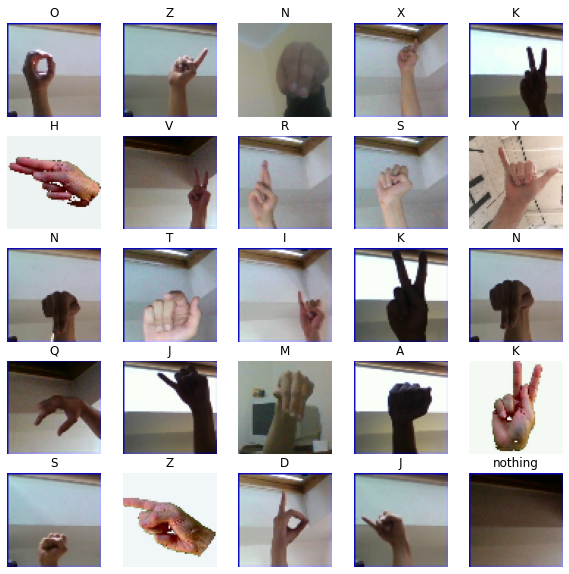

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

## Differents layers :

* Dense layer is a layer that is deeply connected with its preceding layer which means the neurons of the layer are connected to every neuron of its preceding layer. This layer is the most commonly used layer. The dense layer’s neuron in a model receives output from every neuron of its preceding layer, where neurons of the dense layer perform matrix-vector multiplication. Matrix vector multiplication is a procedure where the row vector of the output from the preceding layers is equal to the column vector of the dense layer. The general rule of matrix-vector multiplication is that the row vector must have as many columns like the column vector.

![neural_network2.png](img/neural_network2.png)

* The convolution layer is the core building block of the CNN. It carries the **main** portion of the network’s computational load.This layer performs a dot product between two matrices, where one matrix is the set of learnable parameters otherwise known as a kernel, and the other matrix is the restricted portion of the receptive field. The kernel is spatially smaller than an image but is more in-depth. This means that, if the image is composed of three (RGB) channels, the kernel height and width will be spatially small, but the depth extends up to all three channels. During the forward pass, the kernel slides across the height and width of the image-producing the image representation of that receptive region. This produces a two-dimensional representation of the image known as an **activation map** that gives **the response of the kernel at each spatial position of the image**. The sliding size of the kernel is called a **stride**.

![conv.gif](img/conv.gif) ![conv2.gif](img/conv2.gif)

* Max Pooling is a pooling operation that calculates the maximum value for patches of a feature map, and uses it to create a downsampled (pooled) feature map. It is usually used after a convolutional layer. There are other types of pooling layer here is a [non exhaustive list](https://paperswithcode.com/methods/category/pooling-operation)

![maxpool1.png](img/maxpool1.png)

* Flattening is converting the data into a 1-dimensional array for inputting it to the next layer. We flatten the output of the convolutional layers to create a single long feature vector. And it is connected to the final classification model, which is called a fully-connected layer. In other words, we put all the pixel data in one line and make connections with the final layer.

![flatten.png](img/flatten.png)



# Neural Network

In [17]:
model = Sequential([
    layers.Dense(128, activation='relu', input_shape=(img_height, img_width, 3)),
    layers.Dense(64, activation='relu'),
    layers.Flatten(),
    layers.Dense(len(class_names))
])

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64, 64, 128)       512       
_________________________________________________________________
dense_3 (Dense)              (None, 64, 64, 64)        8256      
_________________________________________________________________
flatten_1 (Flatten)          (None, 262144)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 27)                7077915   
Total params: 7,086,683
Trainable params: 7,086,683
Non-trainable params: 0
_________________________________________________________________


## Training

In [18]:
epochs=10
history = model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=epochs
)

Epoch 1/10
5230/5230 [==============================] - 737s 141ms/step - loss: 7.1979 - accuracy: 0.2050 - val_loss: 2.3942 - val_accuracy: 0.3033
Epoch 2/10
5230/5230 [==============================] - 727s 139ms/step - loss: 2.1443 - accuracy: 0.3720 - val_loss: 2.1765 - val_accuracy: 0.3813
Epoch 3/10
5230/5230 [==============================] - 729s 139ms/step - loss: 1.8835 - accuracy: 0.4426 - val_loss: 2.1249 - val_accuracy: 0.4175
Epoch 4/10
5230/5230 [==============================] - 728s 139ms/step - loss: 1.6640 - accuracy: 0.5009 - val_loss: 1.9418 - val_accuracy: 0.4792
Epoch 5/10
5230/5230 [==============================] - 728s 139ms/step - loss: 1.5557 - accuracy: 0.5367 - val_loss: 1.9640 - val_accuracy: 0.4958
Epoch 6/10
5230/5230 [==============================] - 728s 139ms/step - loss: 1.3802 - accuracy: 0.5846 - val_loss: 1.8724 - val_accuracy: 0.5508
Epoch 7/10
5230/5230 [==============================] - 728s 139ms/step - loss: 1.1931 - accuracy: 0.6364 - val_

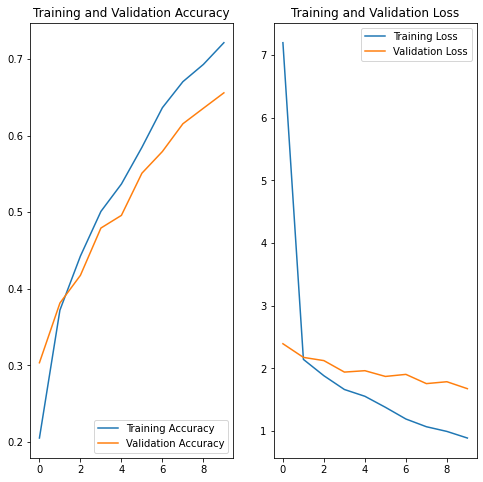

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

here we save the model in the file model, to show you how to save and load trained-model

In [20]:
model.save('model/trained_model_NN.h5')

# Neural network with standardize values

The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network; in general you should seek to make your input values small.
Here, you will standardize values to be in the `[0, 1]` range by using `tf.keras.layers.Rescaling`

In [25]:
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Flatten(),
    layers.Dense(len(class_names))
])

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 64, 64, 3)         0         
_________________________________________________________________
dense_8 (Dense)              (None, 64, 64, 128)       512       
_________________________________________________________________
dense_9 (Dense)              (None, 64, 64, 64)        8256      
_________________________________________________________________
flatten_3 (Flatten)          (None, 262144)            0         
_________________________________________________________________
dense_10 (Dense)             (None, 27)                7077915   
Total params: 7,086,683
Trainable params: 7,086,683
Non-trainable params: 0
_________________________________________________________________


In [28]:
epochs=5
history = model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=epochs
)

Epoch 1/5
5230/5230 [==============================] - 735s 140ms/step - loss: 1.3635 - accuracy: 0.6133 - val_loss: 0.6799 - val_accuracy: 0.8142
Epoch 2/5
5230/5230 [==============================] - 735s 141ms/step - loss: 0.4669 - accuracy: 0.8724 - val_loss: 0.4107 - val_accuracy: 0.8921
Epoch 3/5
5230/5230 [==============================] - 782s 150ms/step - loss: 0.2743 - accuracy: 0.9263 - val_loss: 0.3327 - val_accuracy: 0.9218
Epoch 4/5
5230/5230 [==============================] - 830s 159ms/step - loss: 0.1852 - accuracy: 0.9504 - val_loss: 0.3208 - val_accuracy: 0.9255
Epoch 5/5
5230/5230 [==============================] - 825s 158ms/step - loss: 0.1372 - accuracy: 0.9629 - val_loss: 0.3042 - val_accuracy: 0.9304


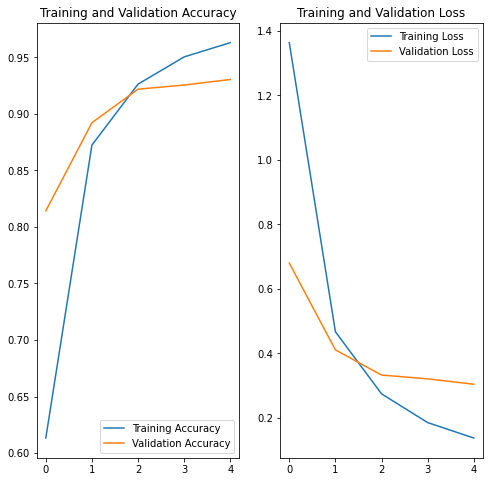

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [30]:
model.save('model/trained_model_NN_with_standardize_value.h5')

# Convolution neural network

![conv_explained.jpeg](img/conv_explained.jpeg)

In [21]:
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu',input_shape=(img_height, img_width, 3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(class_names))
])

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

In [24]:
epochs=10
history = model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=epochs
)

Epoch 1/10
5230/5230 [==============================] - 293s 56ms/step - loss: 0.7543 - accuracy: 0.7950 - val_loss: 0.2534 - val_accuracy: 0.9258
Epoch 2/10
5230/5230 [==============================] - 294s 56ms/step - loss: 0.2029 - accuracy: 0.9399 - val_loss: 0.2702 - val_accuracy: 0.9240
Epoch 3/10
5230/5230 [==============================] - 291s 56ms/step - loss: 0.1477 - accuracy: 0.9578 - val_loss: 0.1471 - val_accuracy: 0.9633
Epoch 4/10
5230/5230 [==============================] - 291s 56ms/step - loss: 0.1279 - accuracy: 0.9651 - val_loss: 0.1367 - val_accuracy: 0.9667
Epoch 5/10
5230/5230 [==============================] - 292s 56ms/step - loss: 0.1187 - accuracy: 0.9693 - val_loss: 0.1594 - val_accuracy: 0.9640
Epoch 6/10
5230/5230 [==============================] - 291s 56ms/step - loss: 0.1071 - accuracy: 0.9738 - val_loss: 0.1423 - val_accuracy: 0.9715
Epoch 7/10
5230/5230 [==============================] - 292s 56ms/step - loss: 0.1053 - accuracy: 0.9756 - val_loss: 0

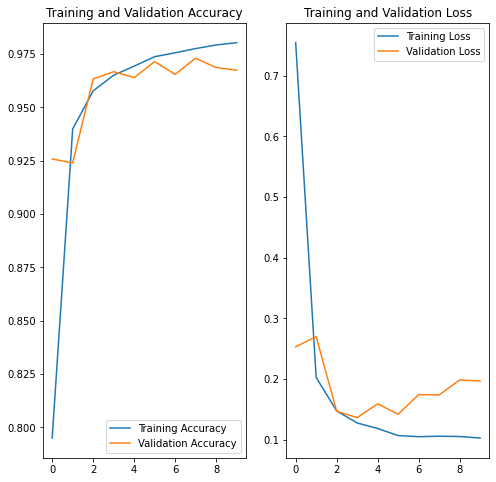

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [26]:
model.save('model/trained_model_CNN.h5')

In [31]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(class_names))
])

In [32]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)         

In [34]:
epochs=5
history = model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=epochs
)

Epoch 1/5
5230/5230 [==============================] - 305s 58ms/step - loss: 0.6430 - accuracy: 0.8095 - val_loss: 0.1929 - val_accuracy: 0.9465
Epoch 2/5
5230/5230 [==============================] - 305s 58ms/step - loss: 0.1279 - accuracy: 0.9625 - val_loss: 0.1168 - val_accuracy: 0.9674
Epoch 3/5
5230/5230 [==============================] - 306s 58ms/step - loss: 0.0757 - accuracy: 0.9772 - val_loss: 0.0835 - val_accuracy: 0.9782
Epoch 4/5
5230/5230 [==============================] - 303s 58ms/step - loss: 0.0552 - accuracy: 0.9831 - val_loss: 0.0713 - val_accuracy: 0.9834
Epoch 5/5
5230/5230 [==============================] - 308s 59ms/step - loss: 0.0467 - accuracy: 0.9859 - val_loss: 0.0841 - val_accuracy: 0.9812


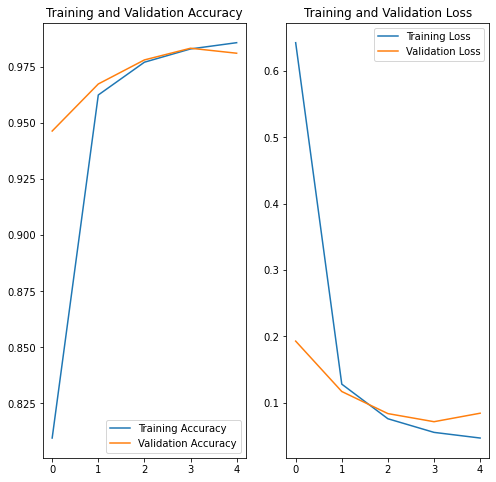

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [37]:
model.save('model/trained_model_CNN_with_standardize_value.h5')

In [39]:
model = keras.models.load_model('model/trained_model_CNN_with_standardize_value.h5')

In [47]:
    
    path = '../Dataset/train/A/1.jpg'
    img = tf.keras.utils.load_img(path, target_size=(img_height, img_width))

    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(class_names[np.argmax(score)], 100 * np.max(score))
    )


This image most likely belongs to A with a 100.00 percent confidence.
